In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.optimize import minimize 
df=np.loadtxt('US.csv',)
N=327000000.0
I=[]
for i in range(len(df)-1):
    I.append((df[i+1]-df[i])/N)
exact=I[:]

In [2]:
def rmse(ybar,y):
    error=0
    for i in range(len(y)):
        error+=(y[i]-ybar[i])**2
    error=np.sqrt(error/float(len(y)))
    return error

In [3]:
def discrete(I,mu=0.90,gamma=0.09,beta1=0.42,beta2=0.012,p=5):
    #prediction=I[:p]
    for i in range(p,len(I)):
        term1=(1-gamma)*I[i-1]
        s=0
        for j in range(i-p,i):
            s+=I[j]
        term2=mu*beta1*I[i-1]*(1-I[i-1]-beta2*i*s/(p+1))
        yhat=term1+term2
        I[i]=yhat
        #prediction.append(yhat)
    return I

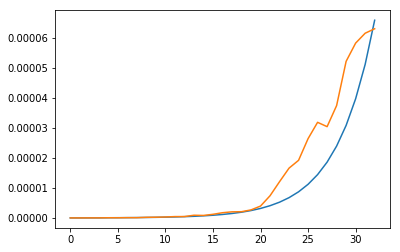

In [6]:
I=discrete(I)
plt.plot(I)
plt.plot(exact)
plt.show()

In [10]:
gamma=0.09
mu=0.9
beta1=0.42
beta2=0.012
#define a function that take gamma as input variable
def Gamma(gamma,I,exact,mu=0.9, beta1=0.42,beta2=0.012,p=3):
    for i in range(p,len(I)):
        term1=(1-gamma)*I[i-1]
        s=0
        for j in range(i-p,i):
            s+=I[j]
        term2=mu*beta1*I[i-1]*(1-I[i-1]-beta2*i*s/(p+1))
        yhat=term1+term2
        I[i]=yhat
    error=rmse(I,exact)
    return error
var=minimize(Gamma,gamma,args=(I,exact,mu,beta1,beta2,3))
var

      fun: 7.802045703730562e-06
 hess_inv: array([[253.77515021]])
      jac: array([5.79909556e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 2
     njev: 10
   status: 0
  success: True
        x: array([0.03537449])

In [11]:
gamma=var['x'][0]
def Mu(mu,I,exact, gamma, beta1,beta2,p=3):
    for i in range(p,len(I)):
        term1=(1-gamma)*I[i-1]
        s=0
        for j in range(i-p,i):
            s+=I[j]
        term2=mu*beta1*I[i-1]*(1-I[i-1]-beta2*i*s/(p+1))
        yhat=term1+term2
        I[i]=yhat
    error=rmse(I,exact)
    return error
minimize(Mu,mu,args=(I,exact,gamma,beta1,beta2,3))
#it does not optimize mu any more

      fun: array([7.8020457e-06])
 hess_inv: array([[1]])
      jac: array([-2.43589182e-06])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.9])

In [13]:
def Beta1(beta1, I, exact, gamma, mu, beta2, p=3):
    for i in range(p,len(I)):
        term1=(1-gamma)*I[i-1]
        s=0
        for j in range(i-p,i):
            s+=I[j]
        term2=mu*beta1*I[i-1]*(1-I[i-1]-beta2*i*s/(p+1))
        yhat=term1+term2
        I[i]=yhat
    error=rmse(I,exact)
    return error
def Beta2(beta2, I, exact, gamma, mu, beta1, p=3):
    for i in range(p,len(I)):
        term1=(1-gamma)*I[i-1]
        s=0
        for j in range(i-p,i):
            s+=I[j]
        term2=mu*beta1*I[i-1]*(1-I[i-1]-beta2*i*s/(p+1))
        yhat=term1+term2
        I[i]=yhat
    error=rmse(I,exact)
    return error
#trying to do alternative updating for 5 iterations
for i in range(5):
    gamma=minimize(Gamma,gamma,args=(I,exact,mu,beta1,beta2,3))['x'][0]
    mu=minimize(Mu,mu,args=(I,exact,gamma,beta1,beta2,3))['x'][0]
    beta1=minimize(Beta1,beta1,args=(I,exact,gamma,mu,beta2,3))['x'][0]
    beta2=minimize(Beta2,beta2,args=(I,exact,gamma,mu,beta1,3))['x'][0]
print(a,b,c,d)

(0.035374491067210884, 0.9, 0.42, 0.012)
